In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances

from matplotlib import pyplot as plt
from matplotlib.pyplot import plot
from sklearn.model_selection import train_test_split



In [2]:
track=pd.read_csv('/content/dataset.csv')

In [3]:
track.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
track['explicit'].value_counts(dropna=False)

,count
explicit,
False,104253
True,9747


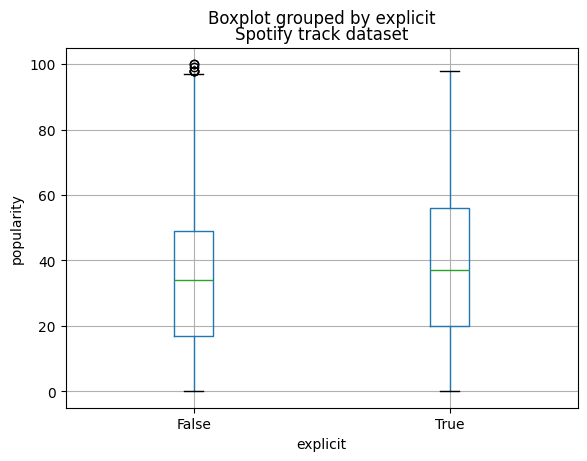

In [5]:
track.boxplot(column=['popularity'], by='explicit')
plt.title('Spotify track dataset')
plt.xlabel('explicit')
plt.ylabel('popularity')
plt.show()

Clustering Songs with K-Means

In [6]:
track = track.drop(['track_id'], axis = 1)

In [7]:
track = track.sort_values(by=['popularity'], ascending=False)
track.drop_duplicates(subset=['track_name'], keep='first', inplace=True)

In [8]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

song_vectorizer = CountVectorizer()
song_vectorizer.fit(track['track_genre'])

CountVectorizer()

In [9]:
track = track.sort_values(by=['popularity'], ascending=False).head(10000)

In [10]:
def get_similarities(song_name, data):

  # Getting vector for the input song.
  text_array1 = song_vectorizer.transform(data[data['track_name']==song_name]['track_genre']).toarray()
  num_array1 = data[data['track_name']==song_name].select_dtypes(include=np.number).to_numpy()

  # We will store similarity for each row of the dataset.
  sim = []
  for idx, row in data.iterrows():
    name = row['track_name']

    # Getting vector for current song.
    text_array2 = song_vectorizer.transform(data[data['track_name']==name]['track_genre']).toarray()
    num_array2 = data[data['track_name']==name].select_dtypes(include=np.number).to_numpy()

    # Calculating similarities for text as well as numeric features
    text_sim = cosine_similarity(text_array1, text_array2)[0][0]
    num_sim = cosine_similarity(num_array1, num_array2)[0][0]
    sim.append(text_sim + num_sim)

  return sim

In [11]:
def recommend_songs(song_name, data=track):
  # Base case
  if track[track['track_name'] == song_name].shape[0] == 0:
    print('This song is either not so popular or you\
    have entered invalid_name.\n Some songs you may like:\n')

    for song in data.sample(n=5)['track_name'].values:
      print(song)
    return

  data['similarity_factor'] = get_similarities(song_name, data)

  data.sort_values(by=['similarity_factor', 'popularity'],
                   ascending = [False, False],
                   inplace=True)

  # First song will be the input song itself as the similarity will be highest.
  display(data[['track_name', 'artists']][2:7])

In [12]:
recommend_songs('Shape of You')


,track_name,artists
81911,Love Story,Taylor Swift
81015,Dandelions,Ruth B.
81863,Paniyon Sa,Rochak Kohli;Atif Aslam;Tulsi Kumar
62435,Let Me Let You Go,ONE OK ROCK
81932,Laagi Lagan Shankara,Hansraj Raghuwanshi


In [13]:
recommend_songs('Spring Day')


,track_name,artists
81066,Tu Jaane Na,Atif Aslam;Pritam
62763,Send Me on My Way,Rusted Root
65180,Magic Shop,BTS
62311,カラノココロ,Anly
65212,Serendipity - Full Length Edition,BTS
